In [1]:
import pandas as pd
import numpy as np

In [7]:
game_stats=pd.read_csv('game_stats_results.csv')
nlp=pd.read_csv('nlp_results.csv')

In [8]:
columns=['home_team','away_team','final_result','predict_stats','proba_stats_home','proba_stats_draw','proba_stats_away']
game_stats=game_stats.loc[:,columns]

In [12]:
columns=['team_home','team_away','result','proba_home','proba_draw','proba_away']
nlp=nlp.loc[:,columns]

In [10]:
def get_stats(row,column):
    home = row['team_home']
    away = row['team_away']
    df=game_stats.query(f'(home_team == "{home}") & (away_team == "{away}")')
    if len(df)==0:
        return np.nan
    else:
        return df[column].values[0]

In [61]:
df=nlp
columns=['proba_stats_home', 'proba_stats_draw', 'proba_stats_away']
for column in columns:
    df[column]=df.apply(lambda row: get_stats(row,column), axis=1)
df=df.dropna()
X=df[['proba_draw','proba_stats_draw','result']]

In [62]:
X.head(1)

,proba_draw,proba_stats_draw,result
0,0.337604,0.429677,Home


In [63]:
X.result=X.result.apply(lambda x: 1 if x == 'Draw' else 0)

In [68]:
X.proba_draw_label=pd.qcut(X.proba_draw,4, labels=range(4,0,-1))
X.proba_stats_draw_label=pd.qcut(X.proba_stats_draw,4, labels=range(4,0,-1))

In [69]:
import seaborn as sns

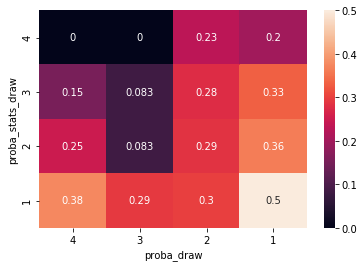

In [70]:
x=pd.crosstab(index=X.proba_stats_draw_label, columns=X.proba_draw_label, values=X.result, aggfunc='mean')
sns.heatmap(x, annot=True)

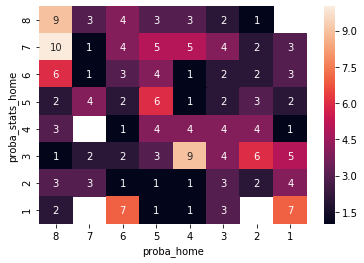

In [57]:
x=pd.crosstab(index=X.proba_stats_home_label, columns=X.proba_home_label, values=X.result, aggfunc='count')
sns.heatmap(x, annot=True)